In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


# Load data from "permdata.txt"
beer = np.loadtxt("beer.txt")
water = np.loadtxt("water.txt")

print(beer)
print(water)

[27. 19. 20. 20. 23. 17. 21. 24. 31. 26. 28. 20. 27. 19. 25. 31. 24. 28.
 24. 29. 21. 21. 28. 27. 20.]
[21. 19. 13. 22. 15. 22. 15. 22. 20. 12. 24. 24. 21. 19. 18. 16. 23. 20.]


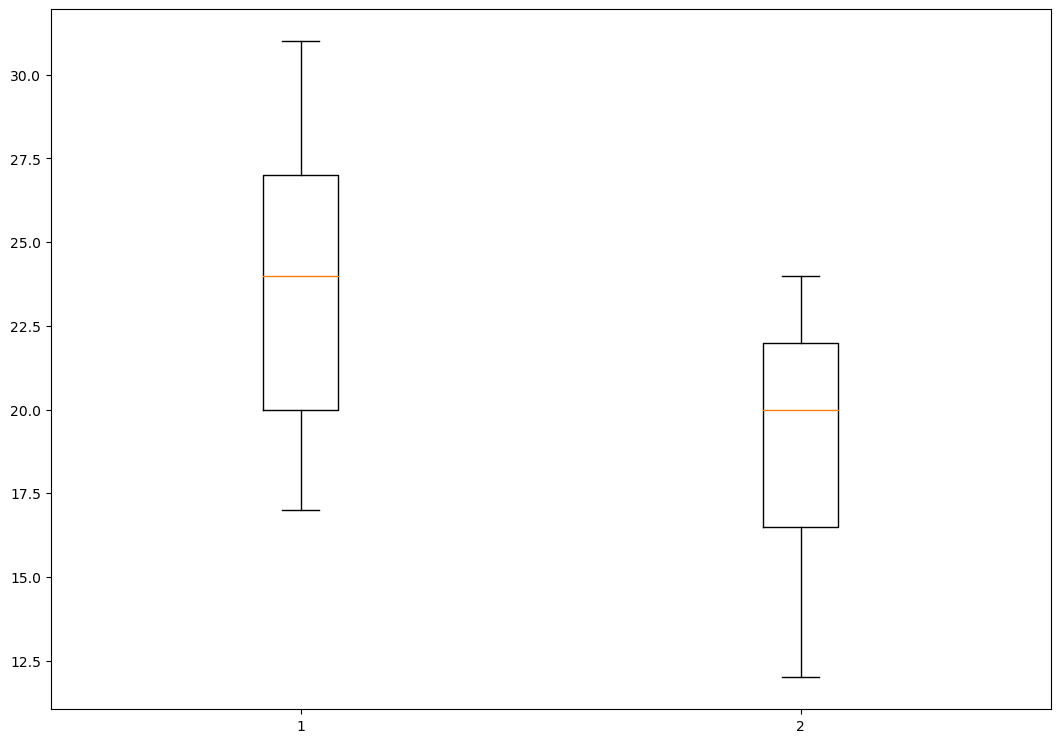

In [137]:

data = [beer, water]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()


In [132]:
# Difference in the mean

diff_mean = np.mean(beer)-np.mean(water)
print(diff_mean)

4.777777777777779


In [133]:
# Prepare data
fData = np.concatenate([beer, water])
m = len(beer)
n = len(water)

print(np.mean(fData[:m]))
print(np.mean(fData[m:]))




24.0
19.22222222222222


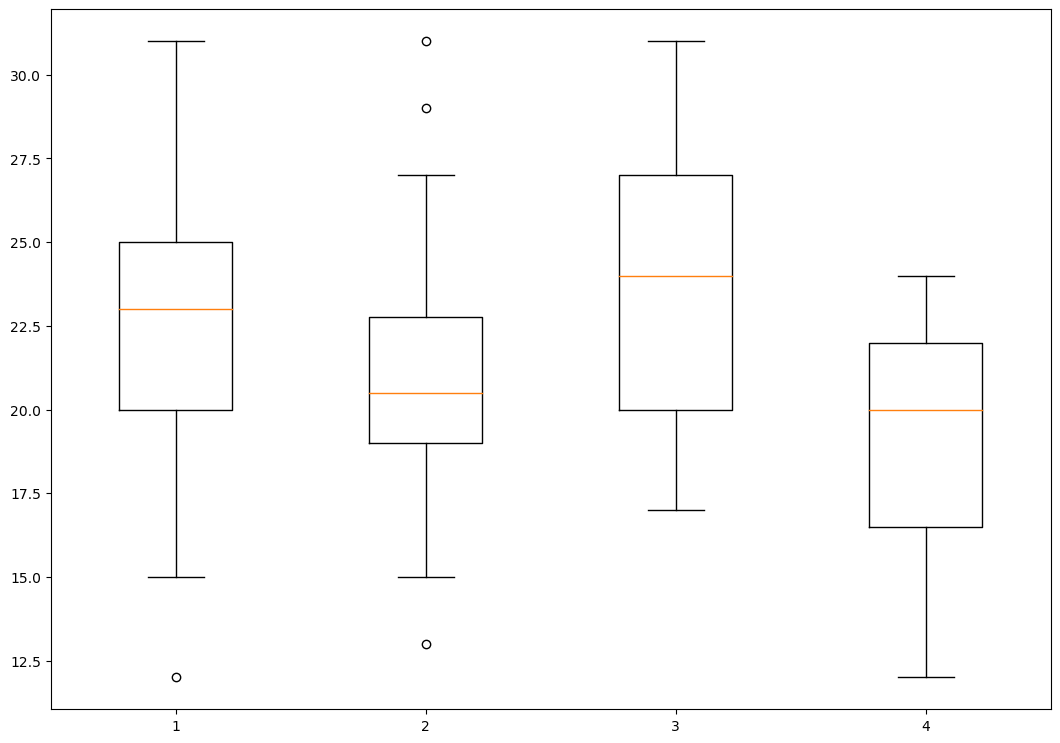

4.777777777777779
1.1466666666666683


In [139]:

x = np.random.permutation(fData)

diff_mean_new = np.mean(x[:m])-np.mean(x[m:])


data_new = [x[:m], x[m:], beer, water]

fig = plt.figure(figsize =(10, 7))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data_new)
#plt.axvline(y=diff_mean, color='blue')
#plt.axvline(y=diff_mean_new, color='red')
# show plot
plt.show()



print(diff_mean)

print(diff_mean_new)



In [140]:
# Number of permutations
B = 1500

# Initialize storage
tot_mean = 0

sTMP1 = np.zeros(B)

# Permutation test
for i in range(B):
    # Generate a random permutation of the elements
    xx = np.random.permutation(fData)
    diff_mean_new = np.mean(xx[:m])-np.mean(xx[m:])
    if diff_mean_new >= diff_mean:
        tot_mean += 1
    sTMP1[i] = diff_mean_new


print(np.min(sTMP1))
print(np.max(sTMP1))



-4.395555555555557
4.300000000000001


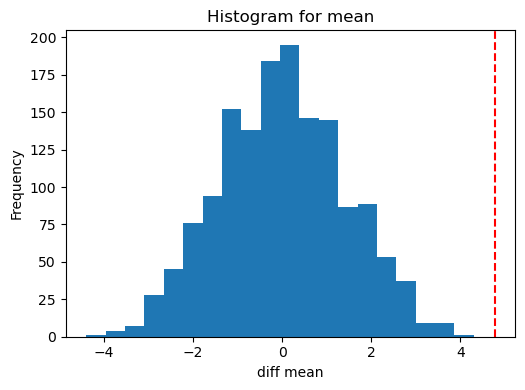

In [141]:
# Show histogram for theta0
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(sTMP1, bins=20)
plt.axvline(diff_mean, color='red', linestyle='--')
plt.xlabel('diff mean')
plt.ylabel('Frequency')
plt.title('Histogram for mean')


plt.tight_layout()
plt.show()

In [129]:
p_value = tot_mean/B
print(p_value)

0.0
